In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import fetch_data

import importlib
importlib.reload(fetch_data)

start_date_str = '2023-05-30'
end_date_str = '2023-06-02'
organization_id = 'hamid'
can_k3y_id = '9ed5b50e'
imu_k3y_id = '78f8031e'

Collect IMU and CAN Server Data

In [12]:
event_dict = fetch_data.get_events(can_k3y_id, organization_id, start_date_str, end_date_str)
can_df = fetch_data.get_can_data(can_k3y_id, organization_id, start_date_str, end_date_str)
imu_df = fetch_data.get_imu_data(imu_k3y_id, organization_id, start_date_str, end_date_str)

CAN time is 1685492228.440194
IMU raw time is 1685492192.0348103
Delta is 36.405383586883545


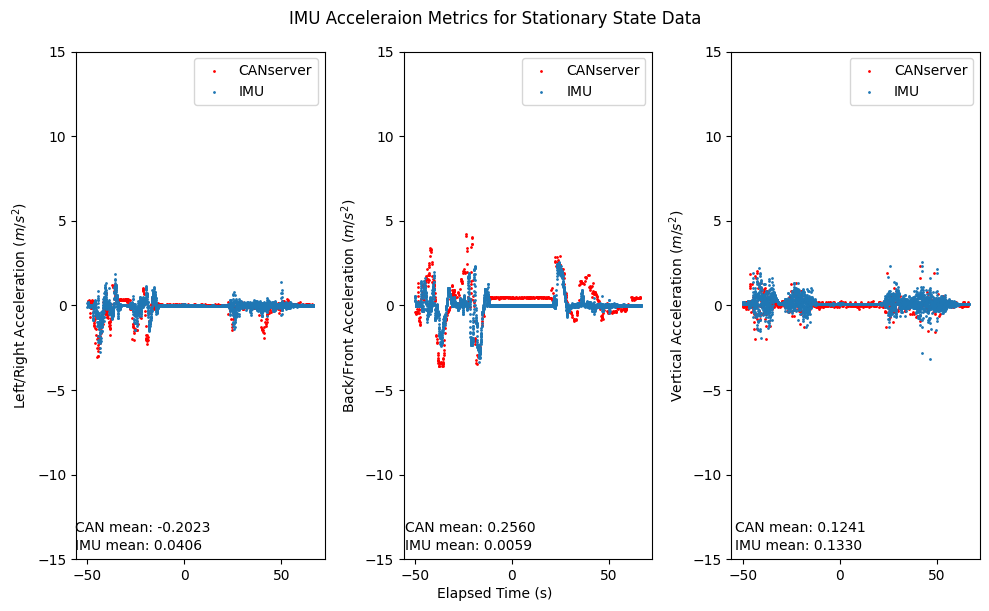

CAN time is 1685492345.689463
IMU raw time is 1685492309.114784
Delta is 36.574678897857666


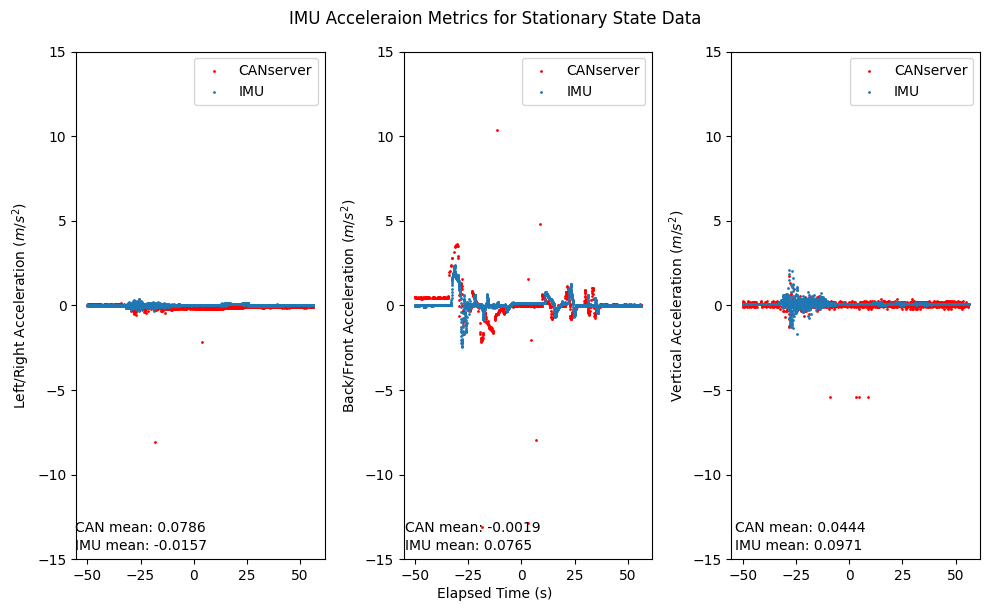

CAN time is 1685492387.888017
IMU raw time is 1685492351.1597104
Delta is 36.72830653190613


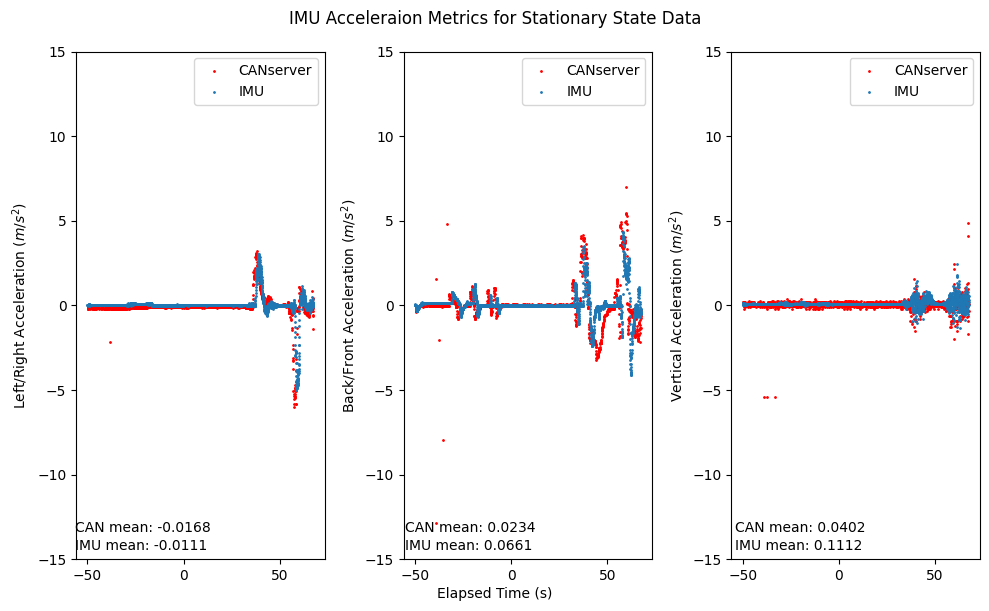

CAN time is 1685544302.935304
IMU raw time is 1685544300.1097183
Delta is 2.8255856037139893


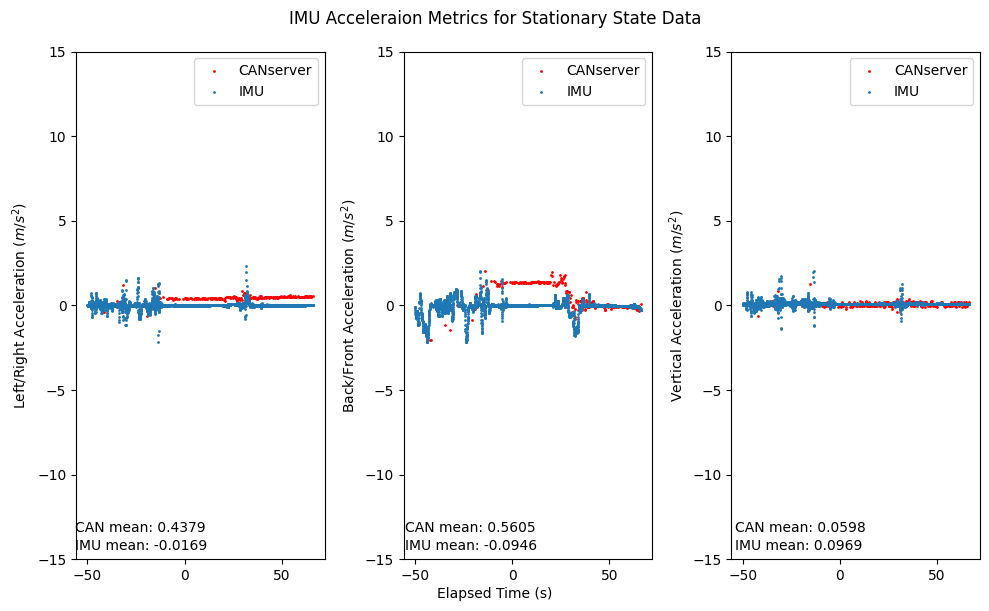

CAN time is 1685551021.636784
IMU raw time is 1685551009.654397
Delta is 11.982387065887451


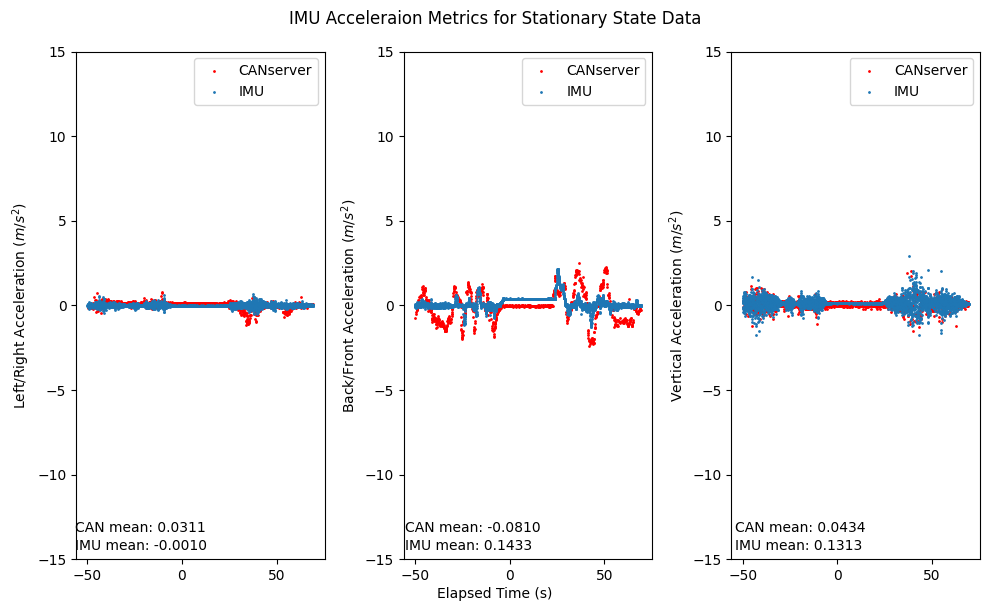

CAN time is 1685551171.935459
IMU raw time is 1685551159.7577803
Delta is 12.17767858505249


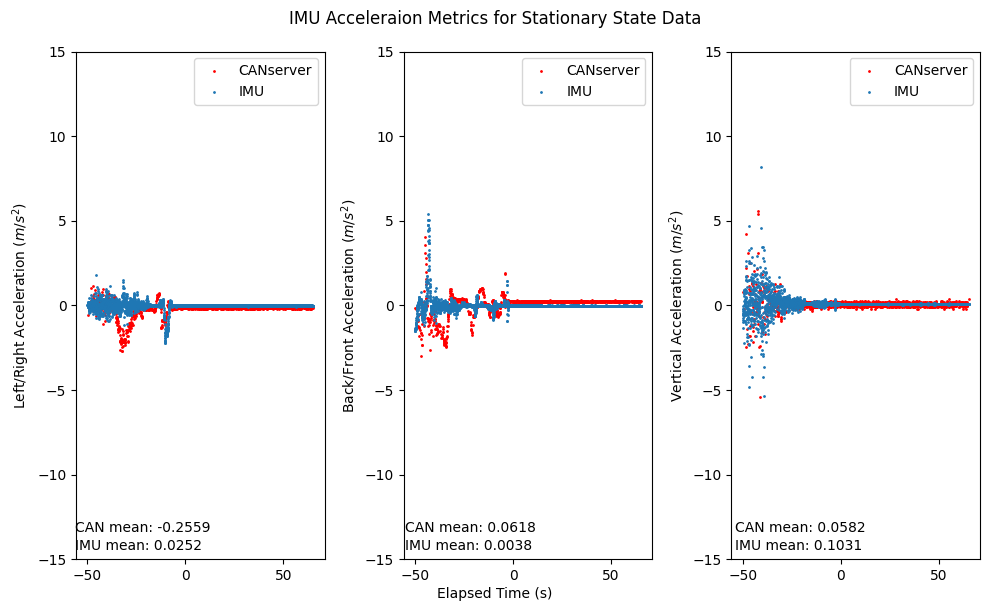

CAN time is 1685551201.24955
IMU raw time is 1685551189.052741
Delta is 12.19680905342102


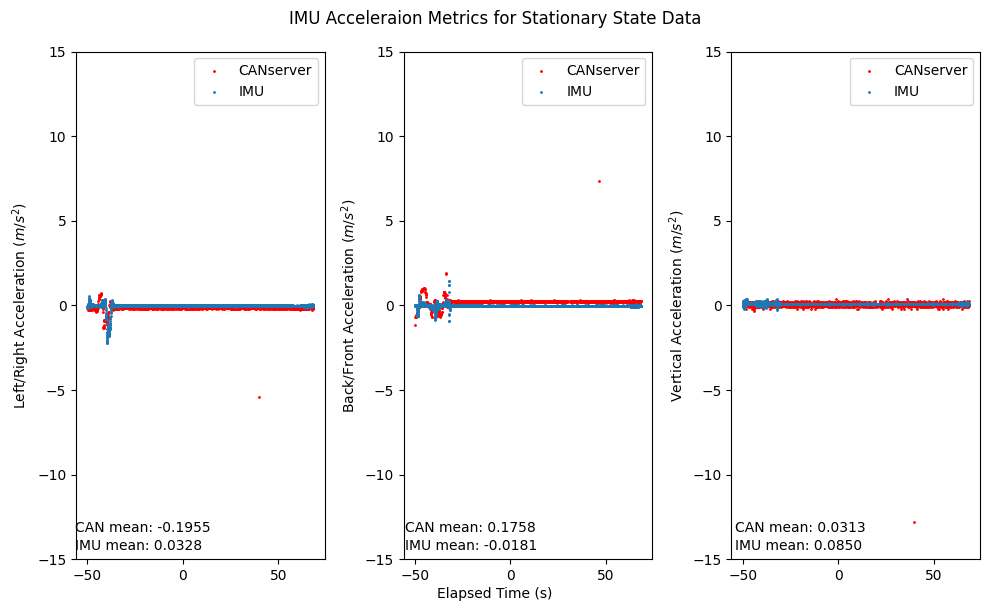

CAN time is 1685551225.90055
IMU raw time is 1685551213.65385
Delta is 12.246699810028076


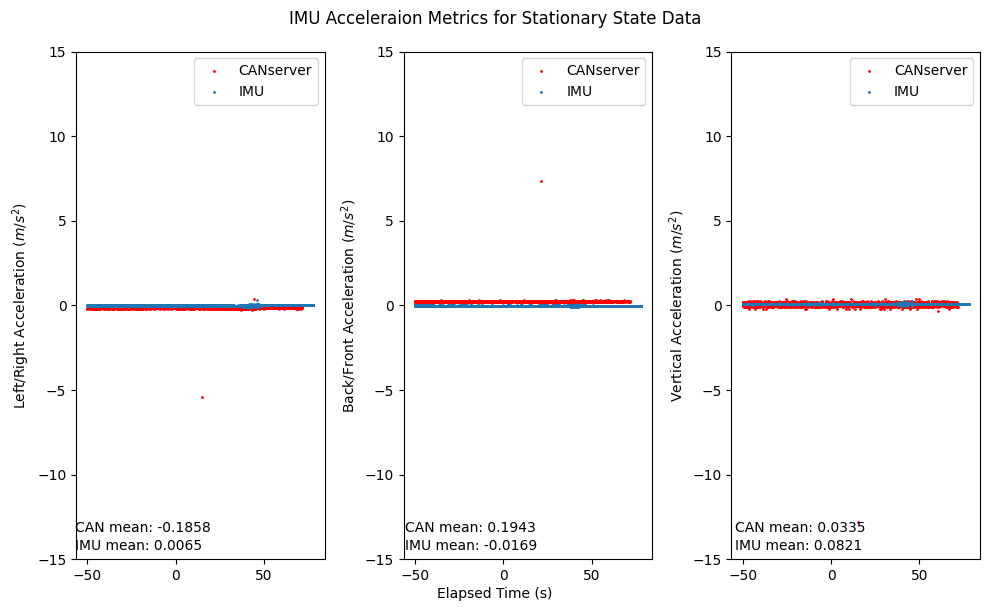

CAN time is 1685580940.48346
IMU raw time is 1685581038.1108325
Delta is -97.62737250328064


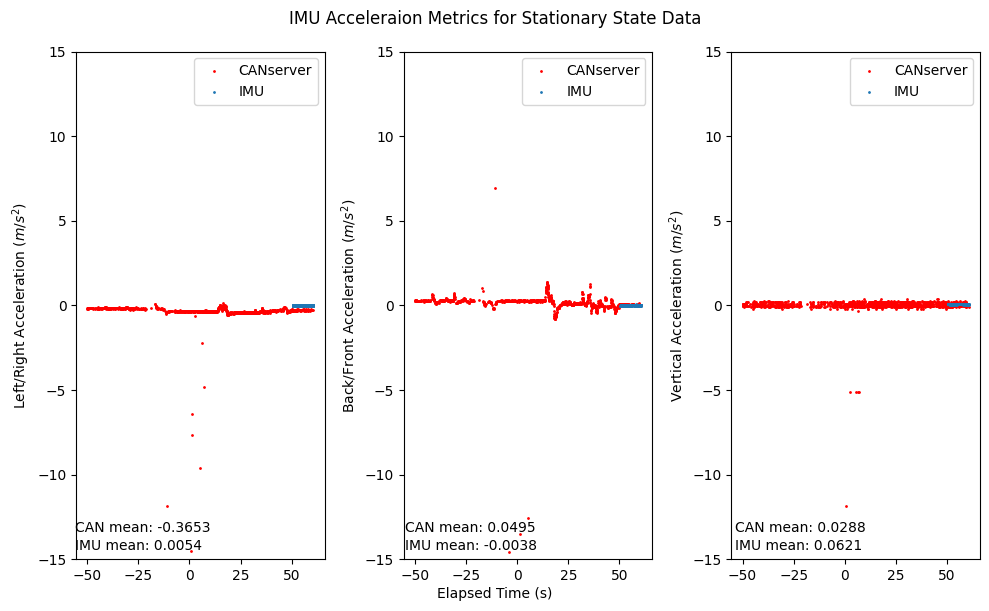

CAN time is 1685581047.222746
IMU raw time is 1685581044.5024602
Delta is 2.720285654067993


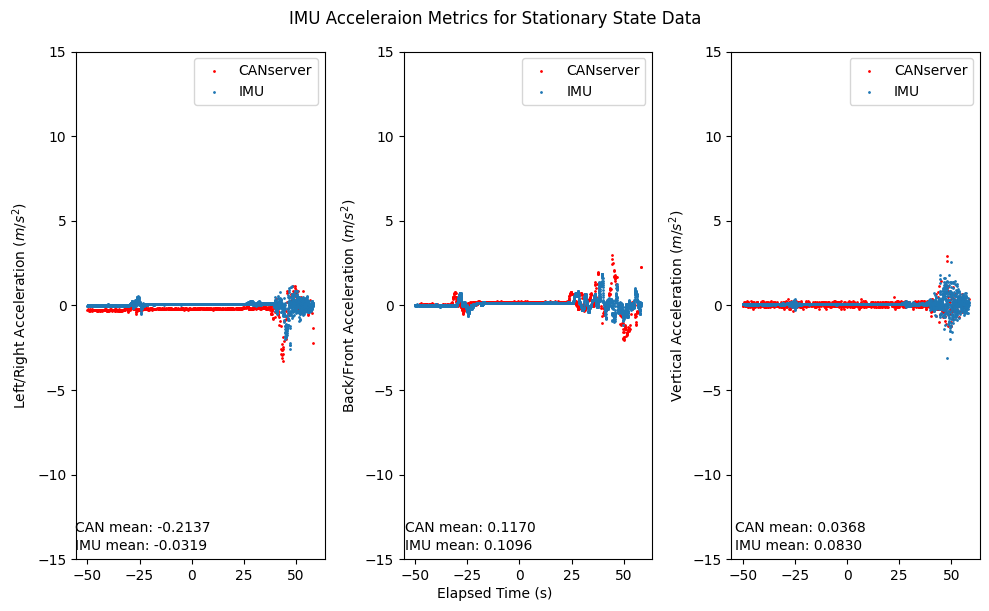

CAN time is 1685581282.090569
IMU raw time is 1685581279.3282015
Delta is 2.7623674869537354


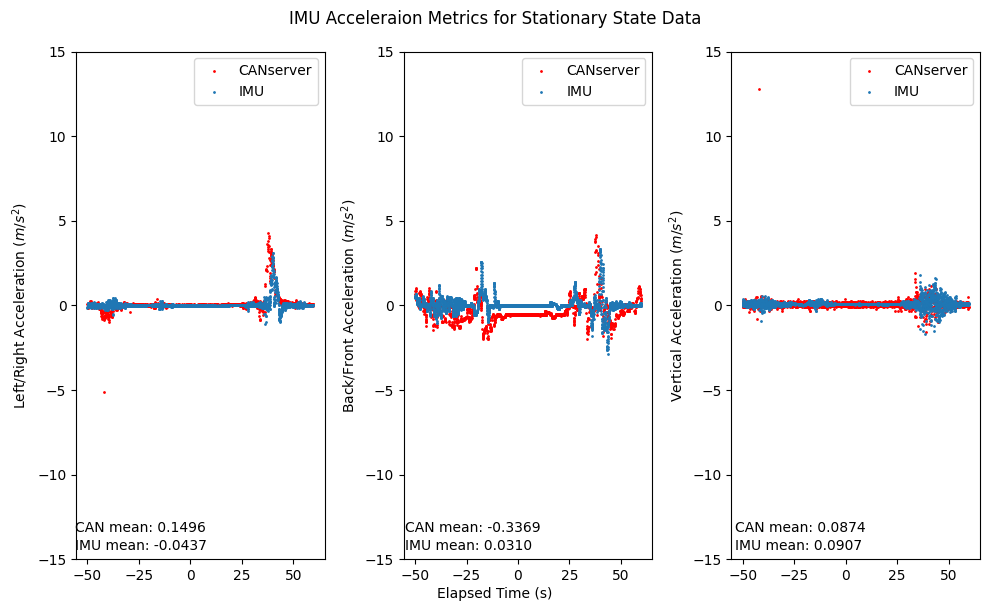

CAN time is 1685582283.004279
IMU raw time is 1685582279.9841352
Delta is 3.020143747329712


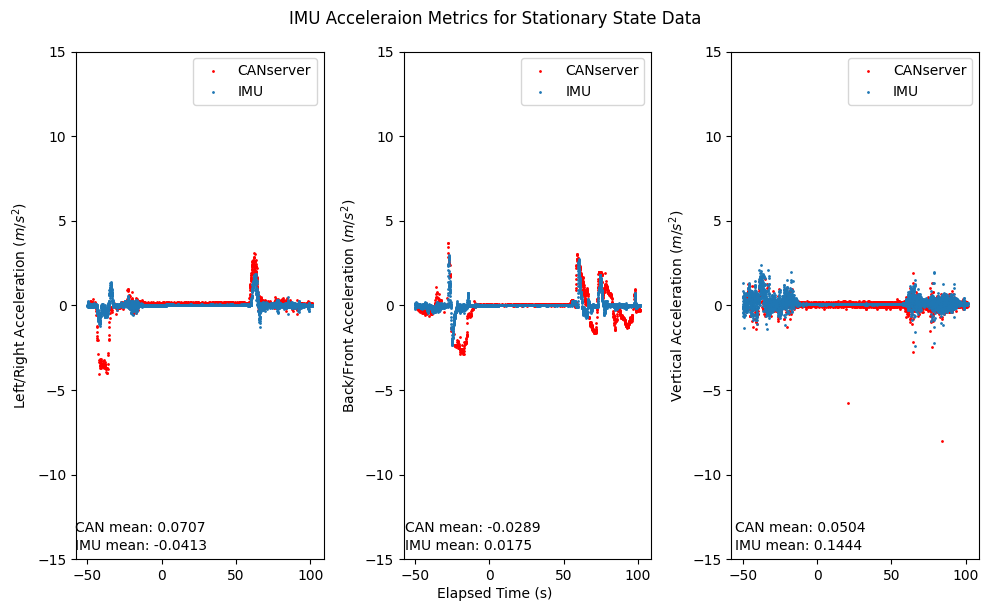

CAN time is 1685582298.210888
IMU raw time is 1685582295.3307
Delta is 2.88018798828125


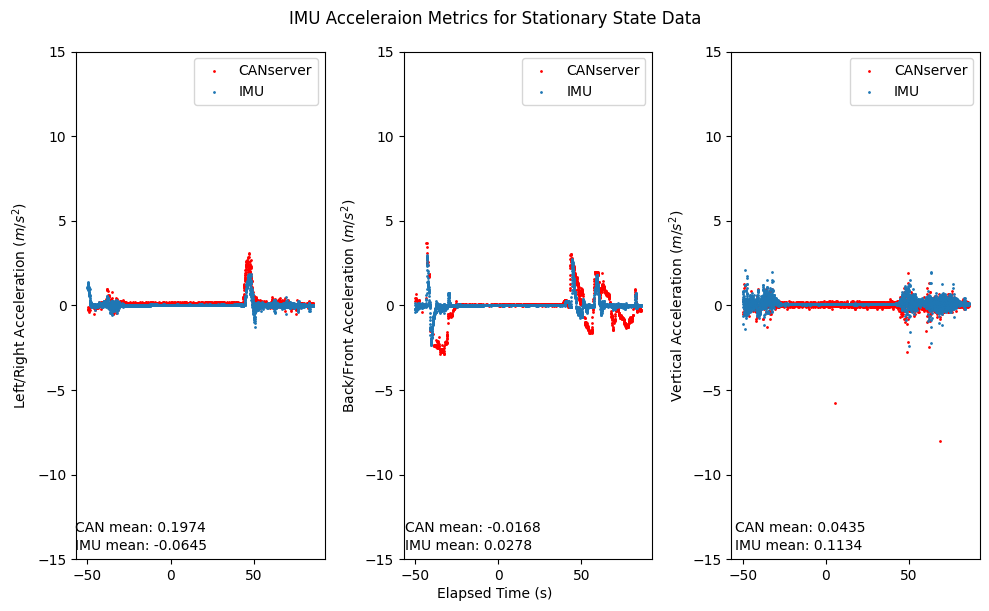

CAN time is 1685582867.807074
IMU raw time is 1685582864.917946
Delta is 2.8891279697418213


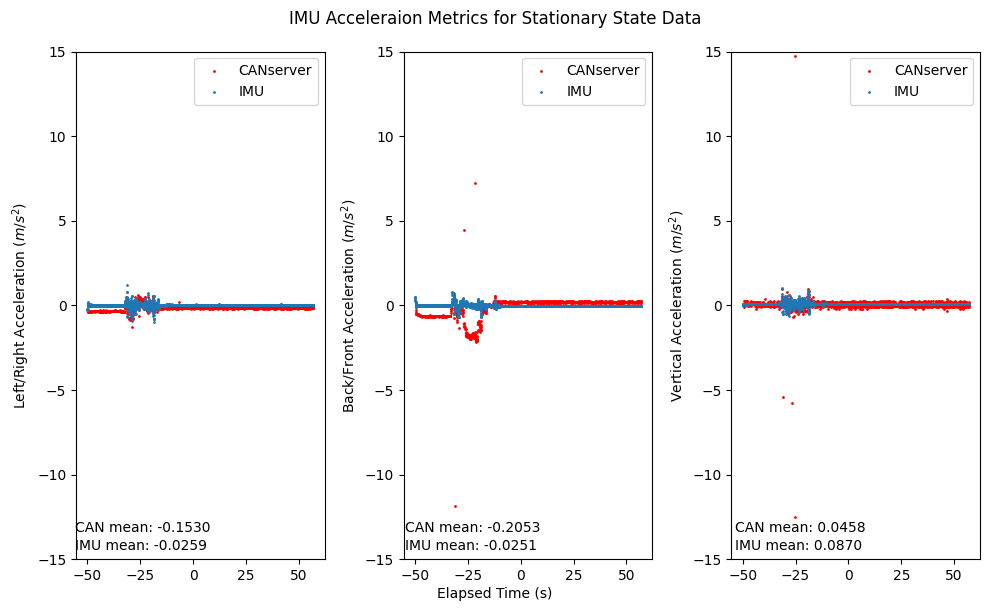

CAN time is 1685582881.106074
IMU raw time is 1685582878.2338371
Delta is 2.872236967086792


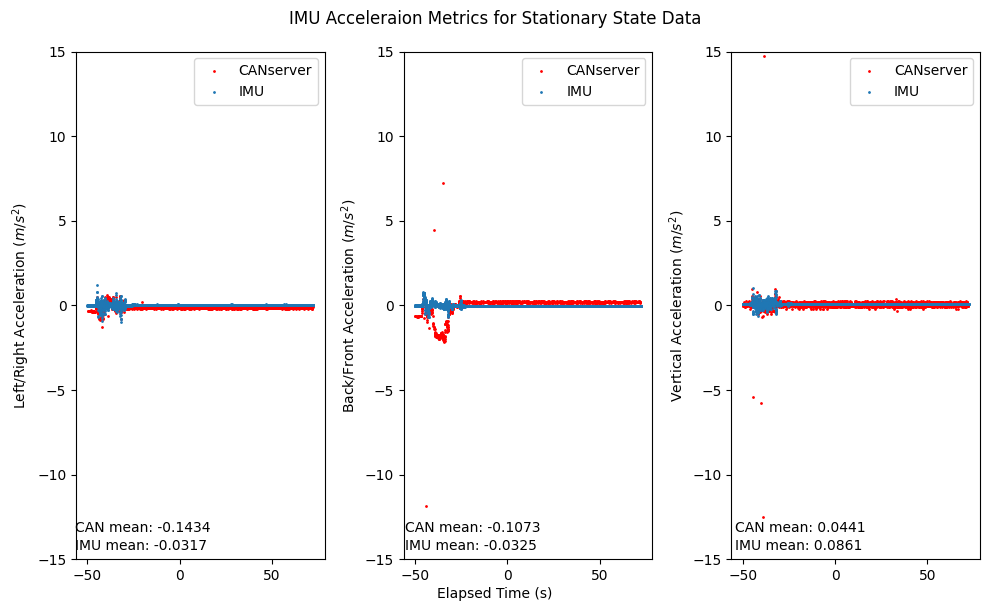

CAN time is 1685582913.587436
IMU raw time is 1685582910.6247427
Delta is 2.962693214416504


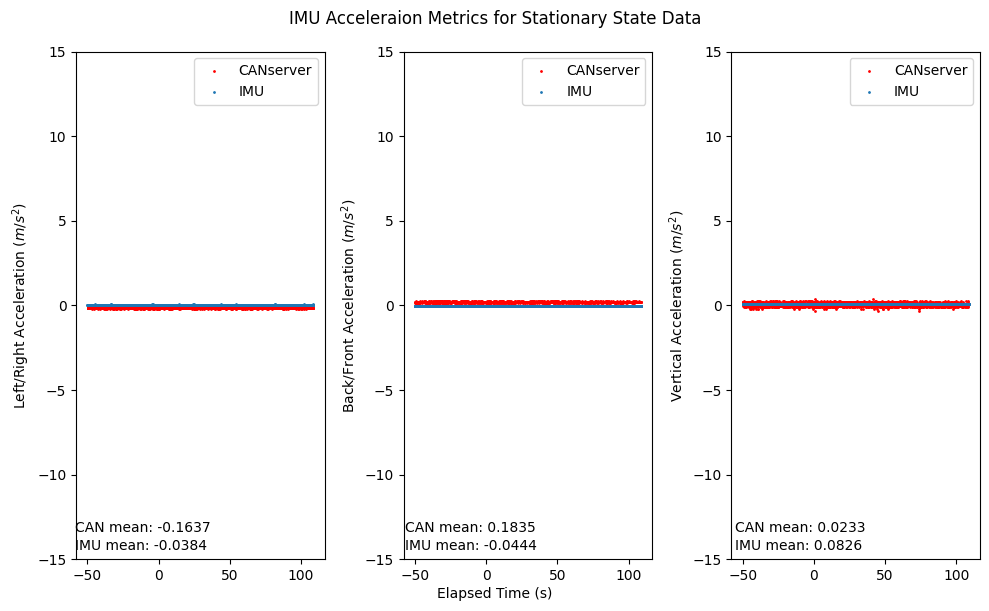

CAN time is 1685582978.715119
IMU raw time is 1685582975.80603
Delta is 2.9090888500213623


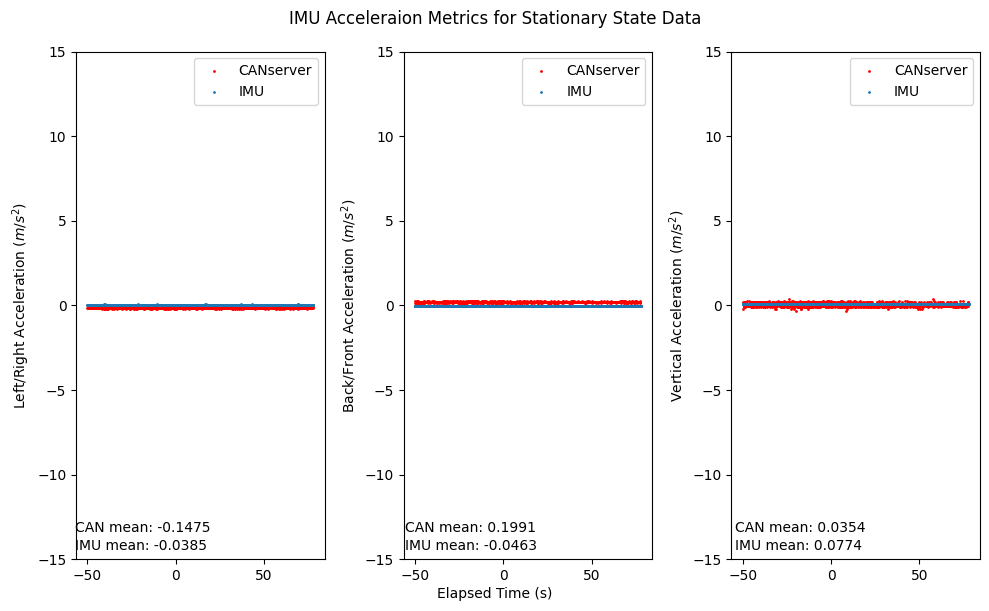

CAN time is 1685583027.815645
IMU raw time is 1685583024.9083788
Delta is 2.907266139984131


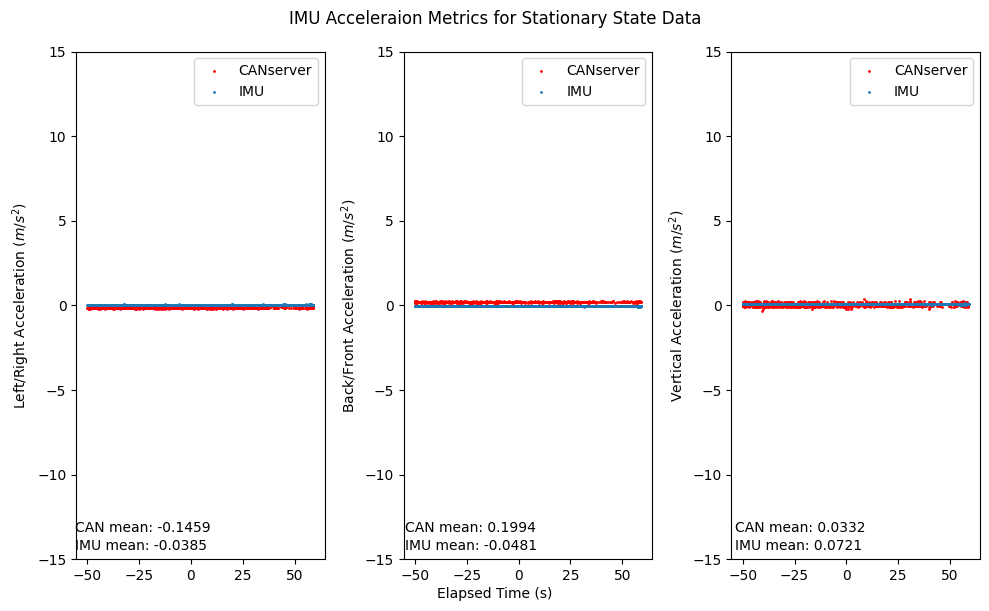

CAN time is 1685583048.474645
IMU raw time is 1685583045.5480103
Delta is 2.9266345500946045


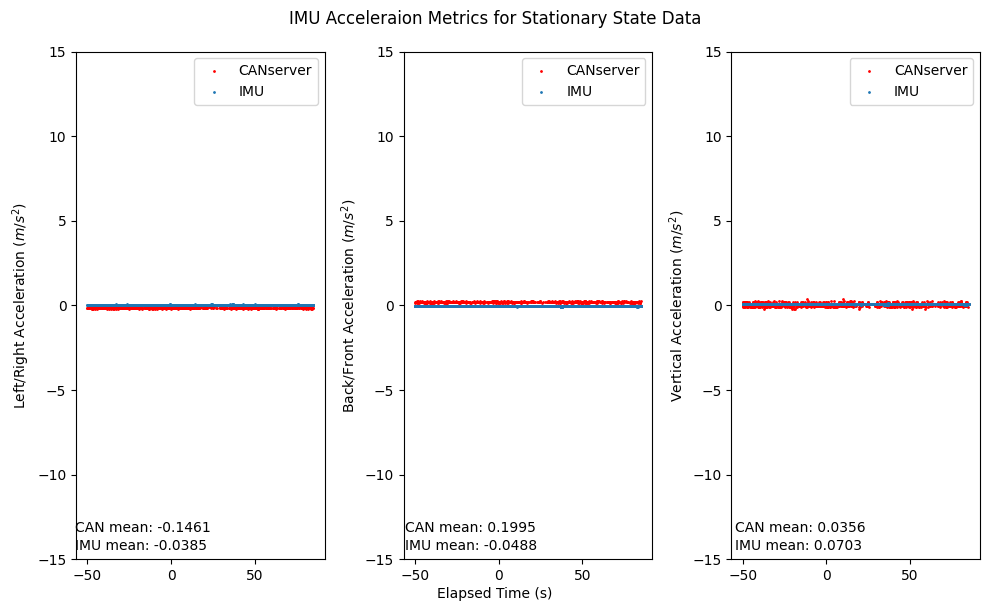

CAN time is 1685583089.777021
IMU raw time is 1685583086.7939832
Delta is 2.9830377101898193


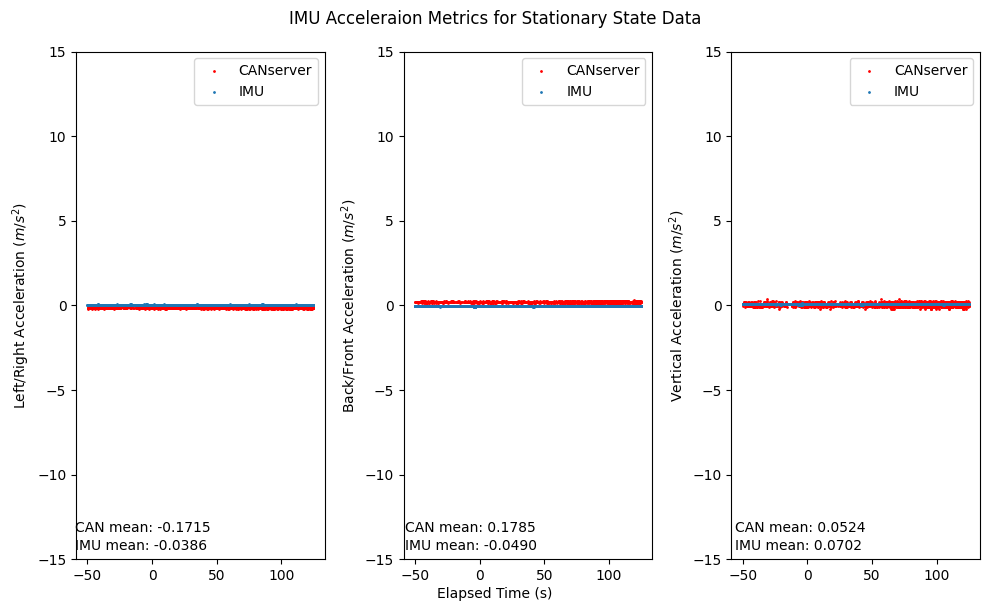

CAN time is 1685583171.844751
IMU raw time is 1685583168.7865832
Delta is 3.0581676959991455


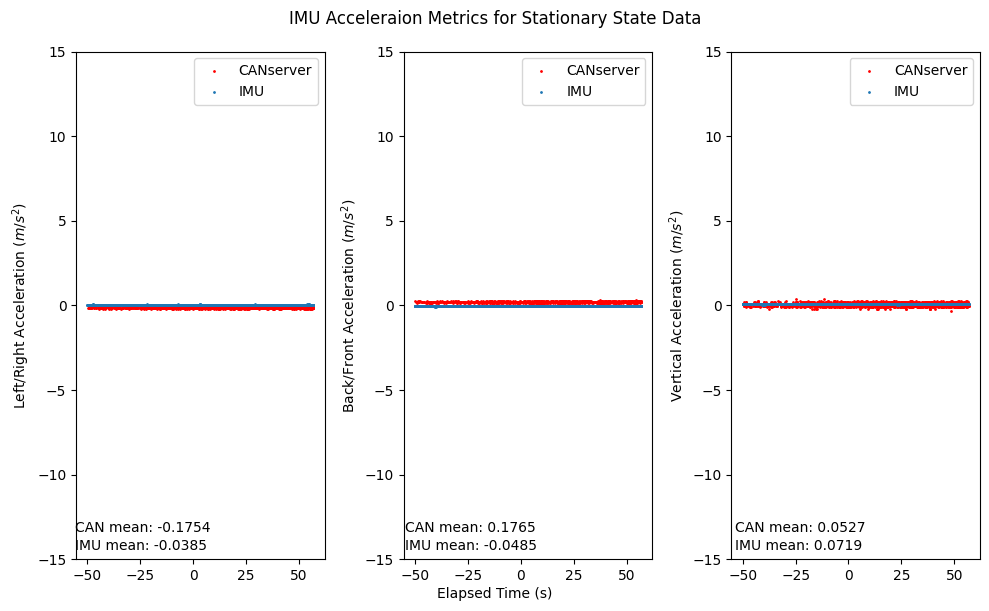

CAN time is 1685583184.663751
IMU raw time is 1685583181.7029977
Delta is 2.9607532024383545


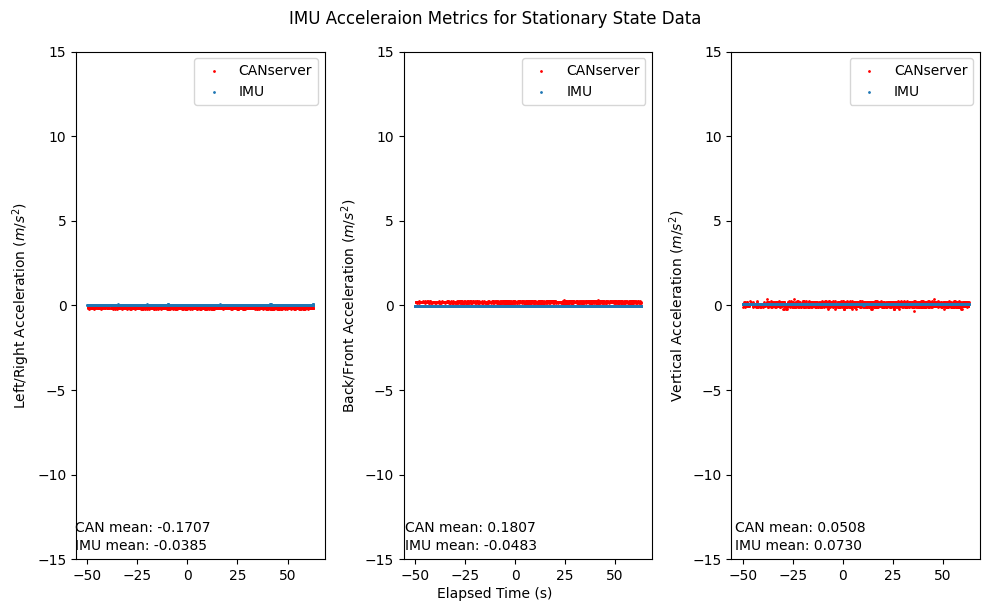

CAN time is 1685583209.70255
IMU raw time is 1685583206.770163
Delta is 2.932386875152588


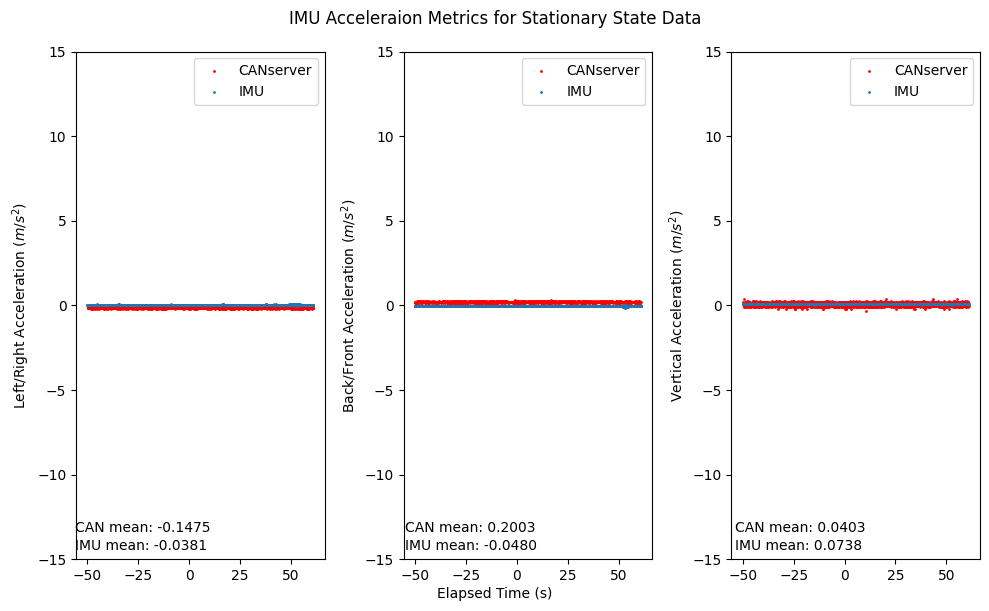

CAN time is 1685583242.591014
IMU raw time is 1685583239.6604142
Delta is 2.9305996894836426


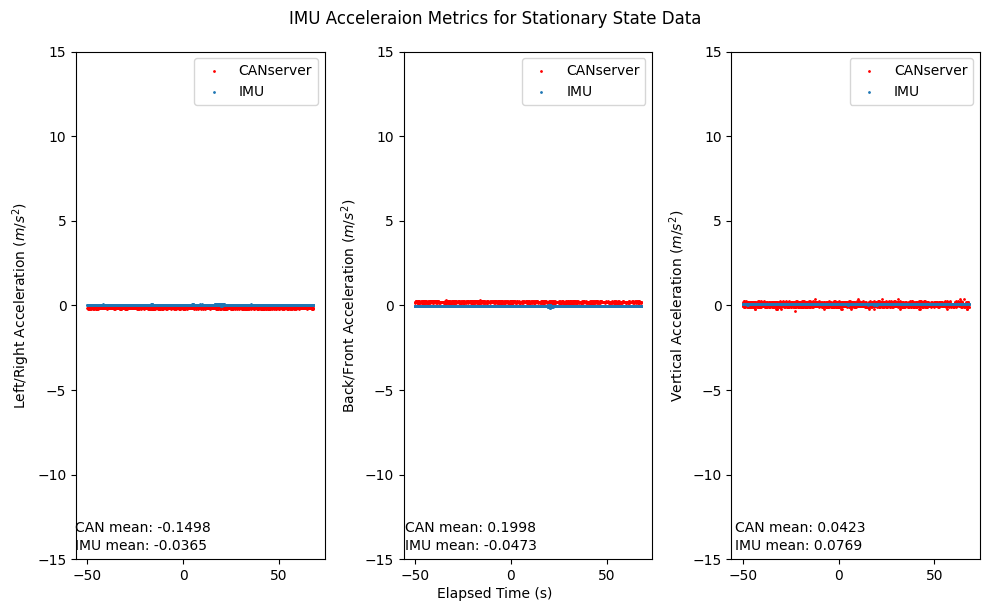

CAN time is 1685583278.893072
IMU raw time is 1685583275.9795074
Delta is 2.913564443588257


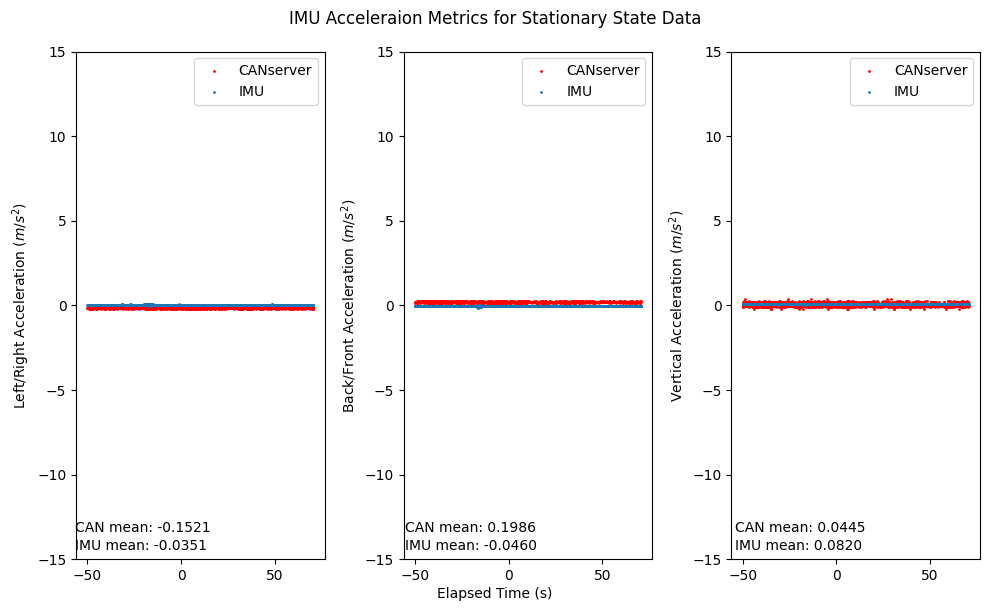

CAN time is 1685583318.605744
IMU raw time is 1685583315.6608632
Delta is 2.944880723953247


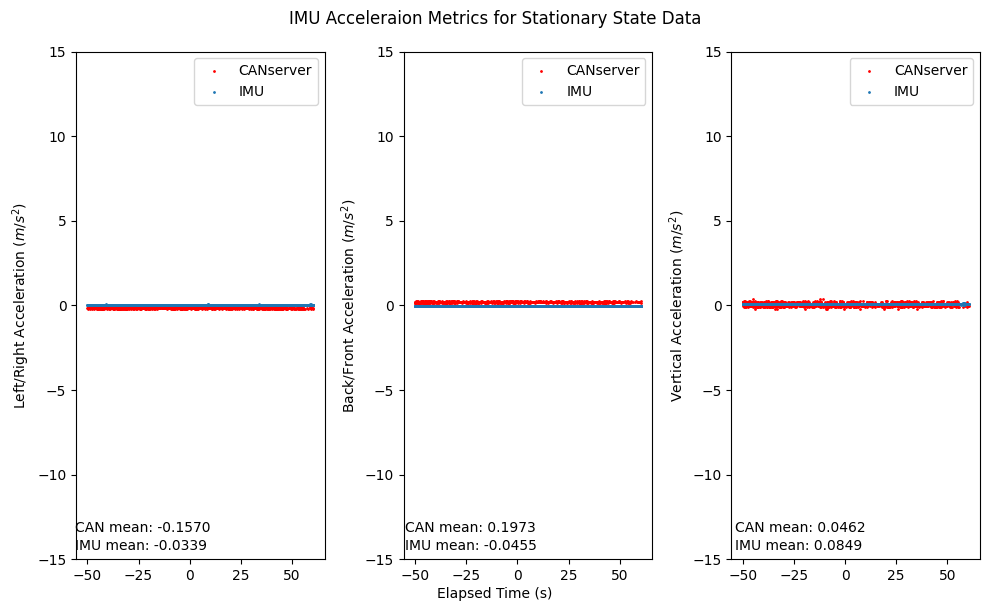

CAN time is 1685583348.403024
IMU raw time is 1685583345.4551697
Delta is 2.9478542804718018


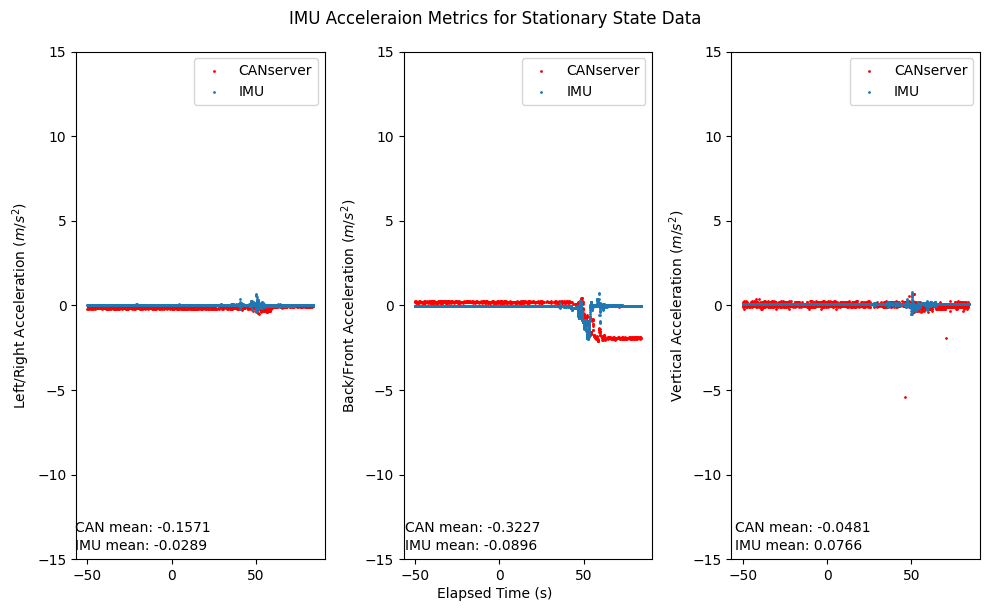

CAN time is 1685583997.720493
IMU raw time is 1685583991.1094444
Delta is 6.611048698425293


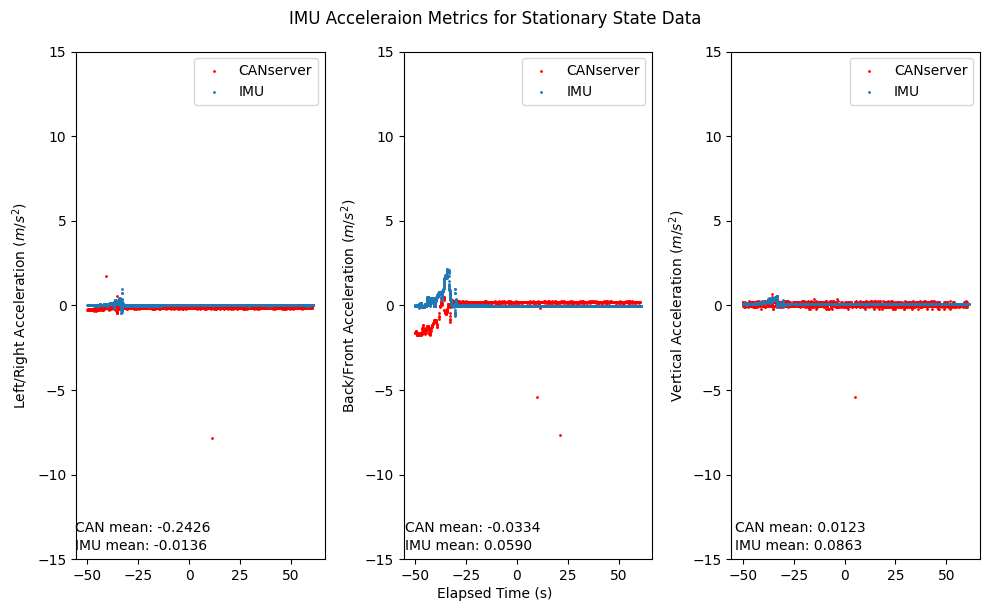

CAN time is 1685584014.800152
IMU raw time is 1685584008.120495
Delta is 6.679656982421875


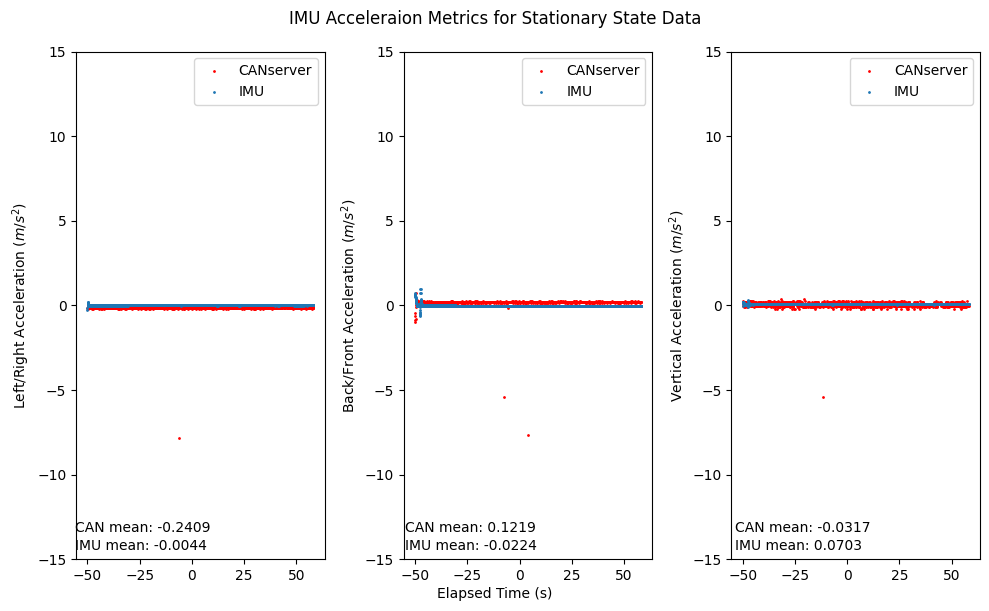

CAN time is 1685584029.200152
IMU raw time is 1685584022.5349476
Delta is 6.665204286575317


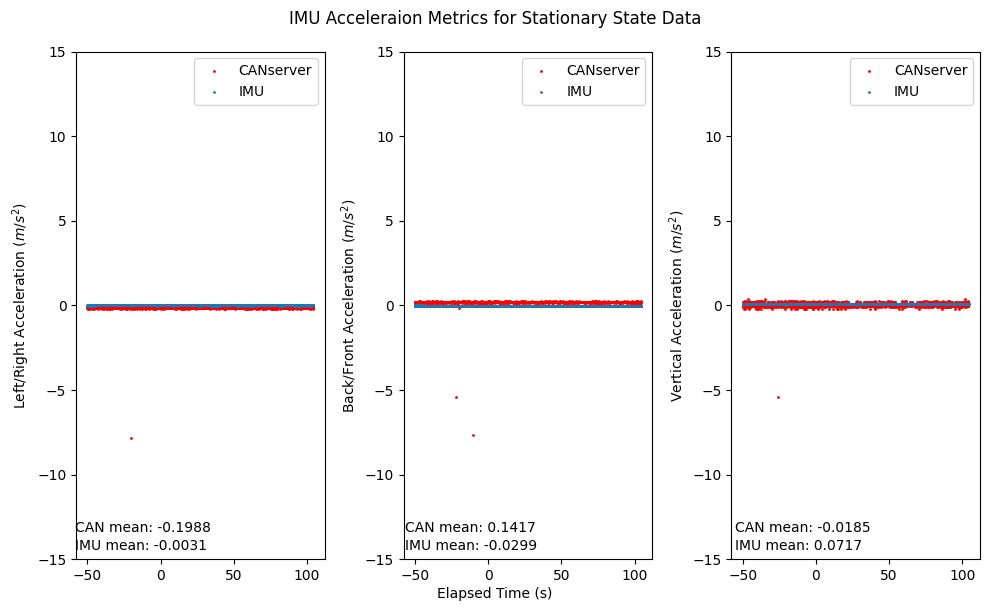

CAN time is 1685584107.302558
IMU raw time is 1685584100.4662008
Delta is 6.836357116699219


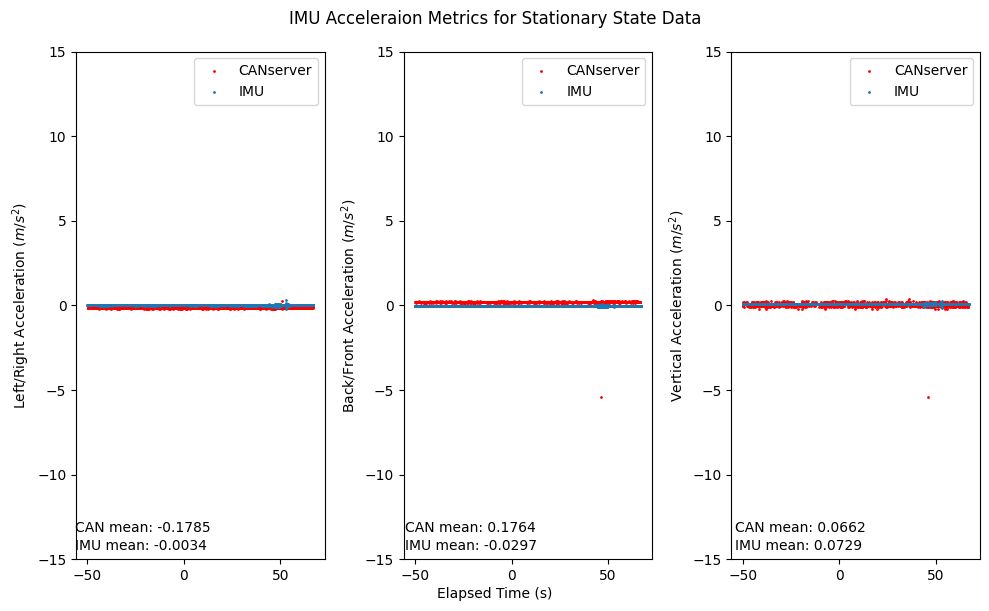

CAN time is 1685584139.919651
IMU raw time is 1685584133.0568445
Delta is 6.862806558609009


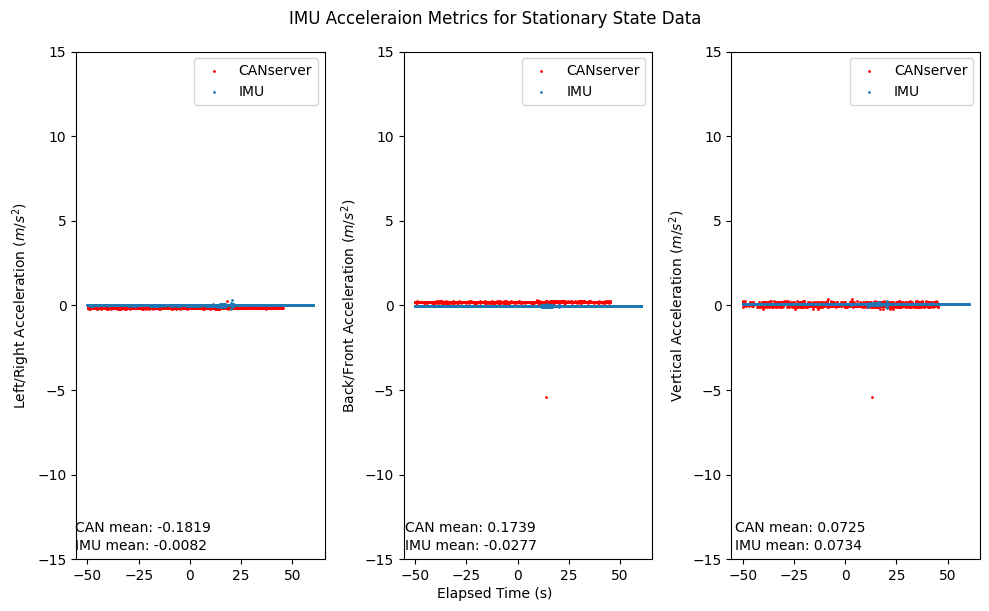

CAN time is 1685632735.063714
IMU raw time is 1685632679.994894
Delta is 55.068819999694824


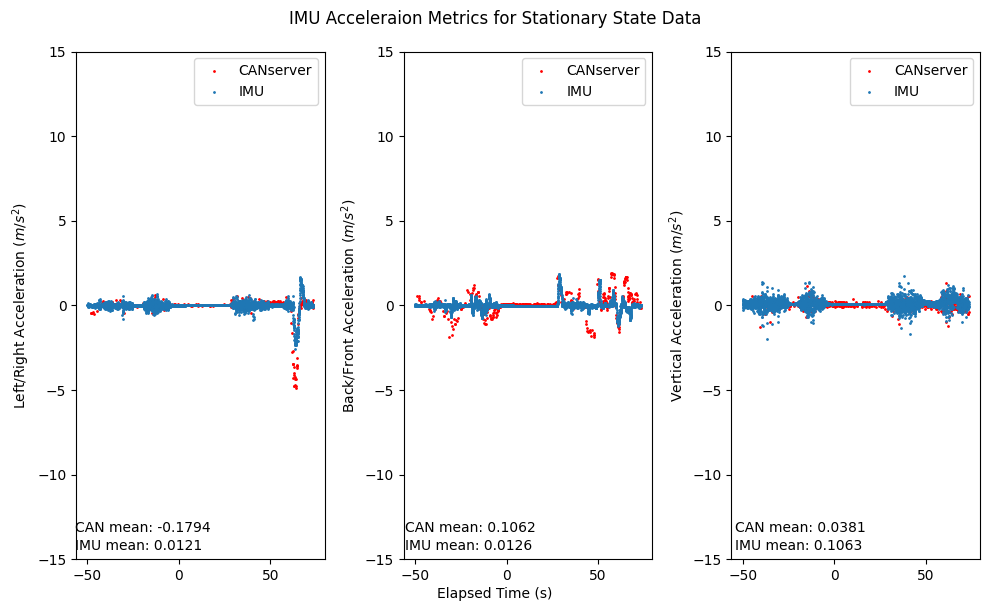

CAN time is 1685633569.034528
IMU raw time is 1685633513.3366551
Delta is 55.69787287712097


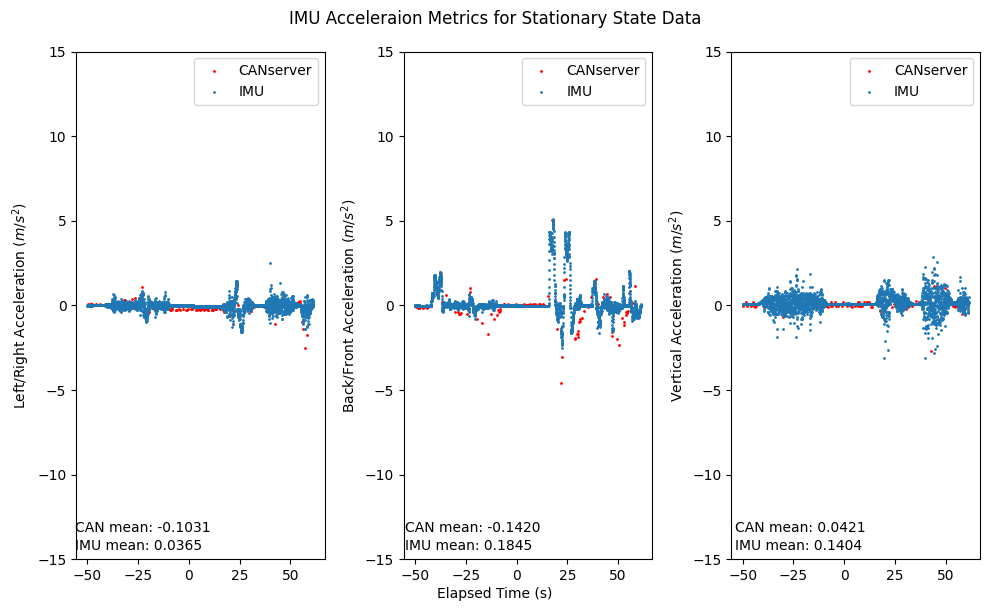

CAN time is 1685661425.227717
IMU raw time is 1685661372.9677215
Delta is 52.259995460510254


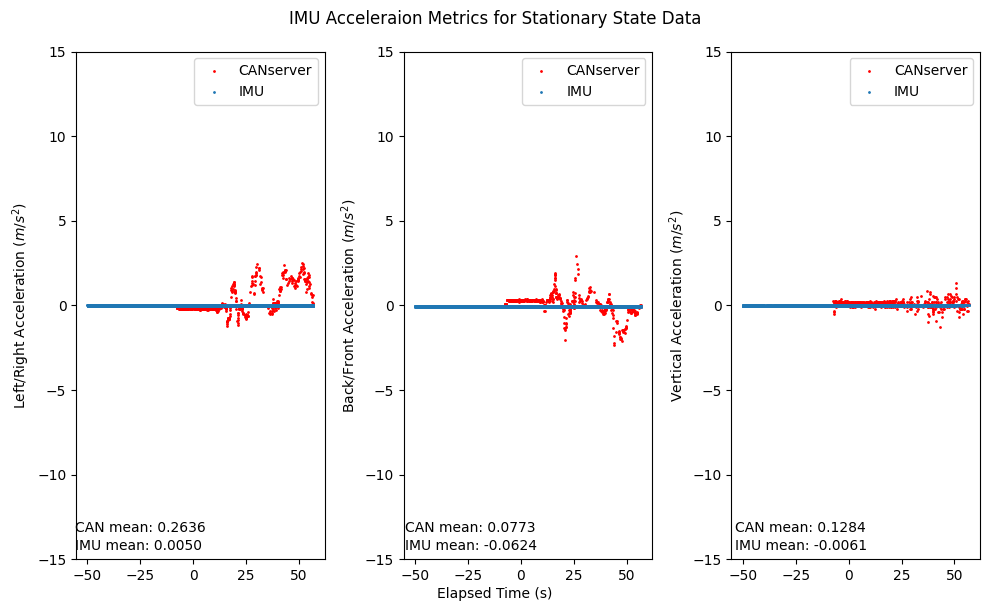

CAN time is 1685661606.36241
IMU raw time is 1685661596.1087682
Delta is 10.253641843795776


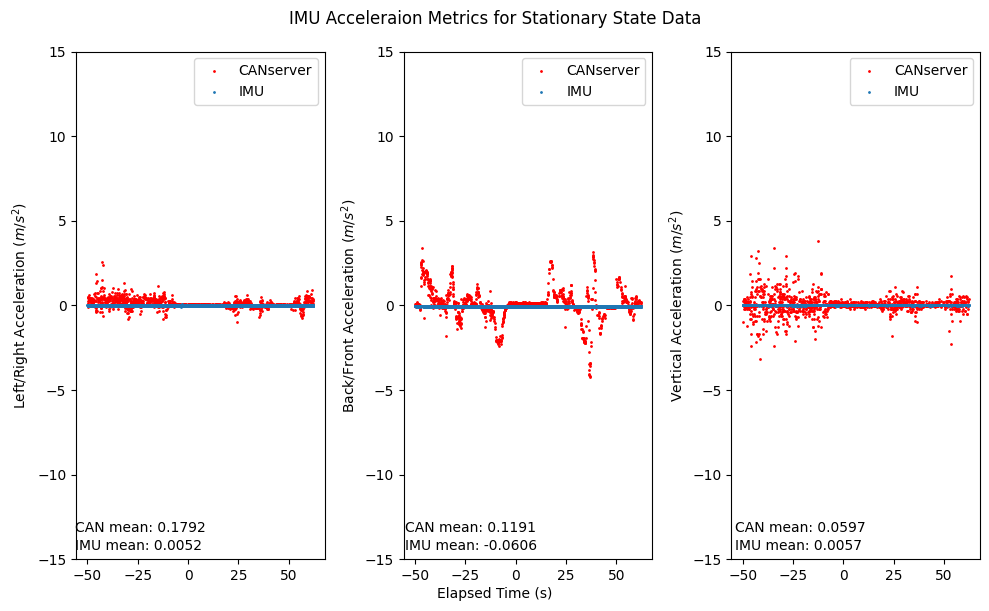

CAN time is 1685661872.818919
IMU raw time is 1685661862.2601435
Delta is 10.558775424957275


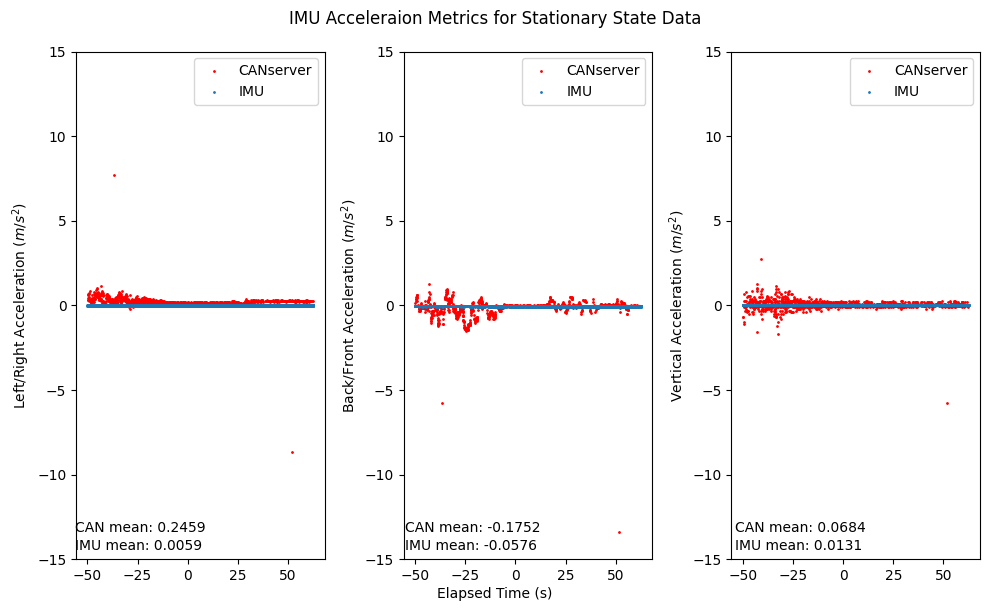

CAN time is 1685662031.171809
IMU raw time is 1685662020.4529312
Delta is 10.718877792358398


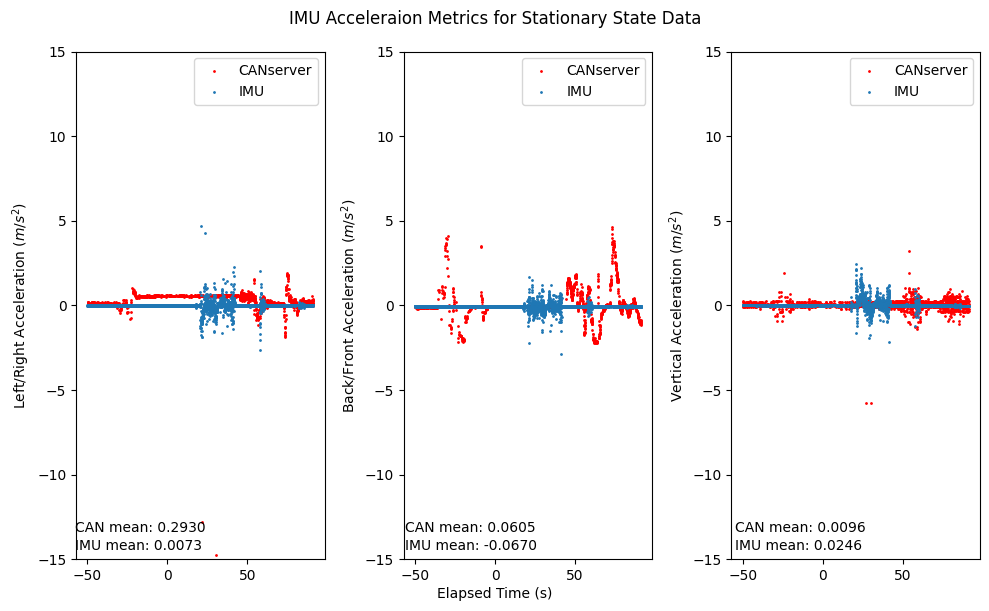

CAN time is 1685662525.02126
IMU raw time is 1685662513.673541
Delta is 11.347718954086304


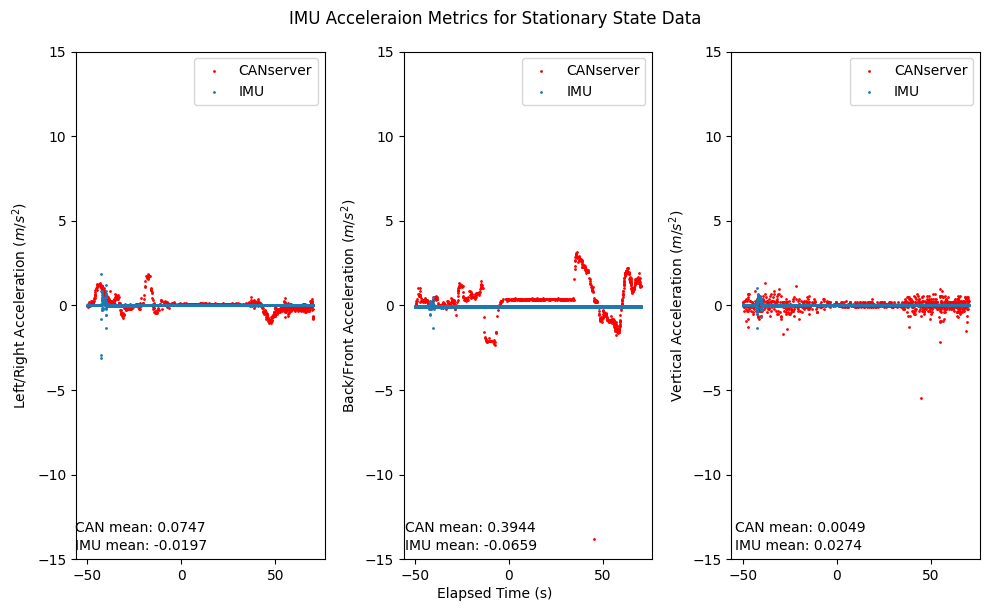

CAN time is 1685662804.225381
IMU raw time is 1685662792.475013
Delta is 11.750367879867554


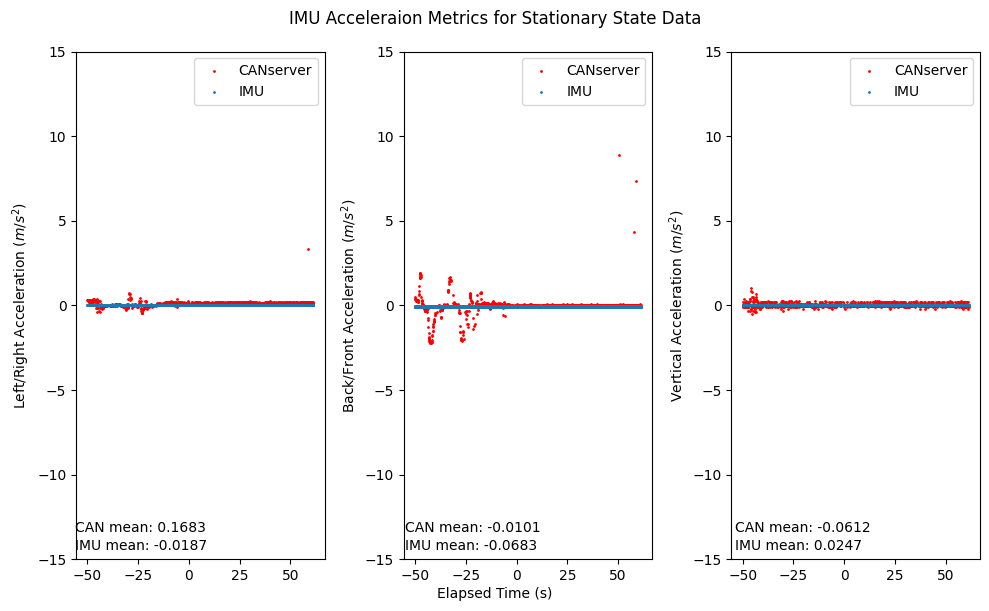

CAN time is 1685662834.061446
IMU raw time is 1685662822.2360299
Delta is 11.825416088104248


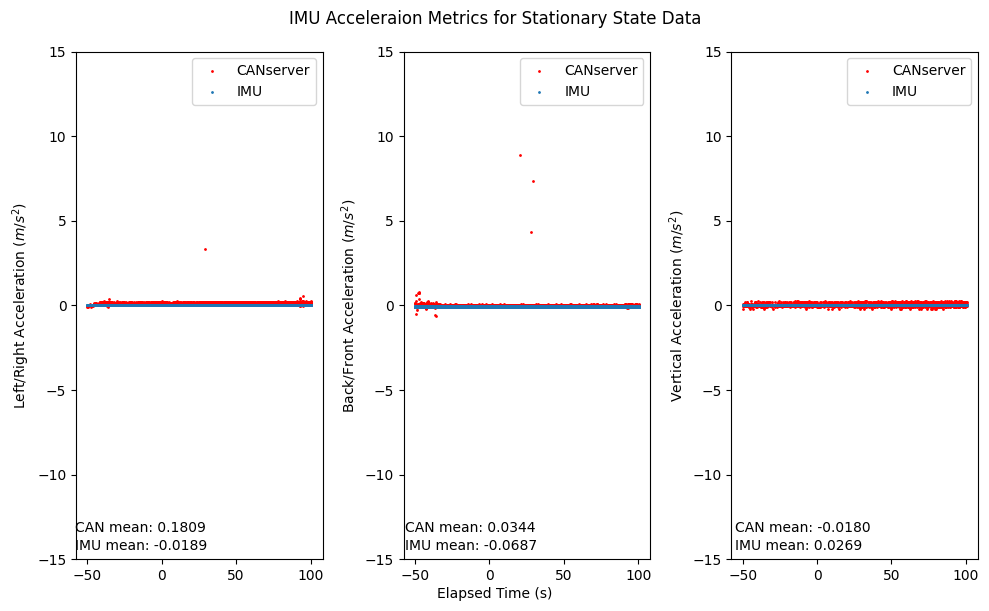

CAN time is 1685662890.860147
IMU raw time is 1685662878.761988
Delta is 12.098159074783325


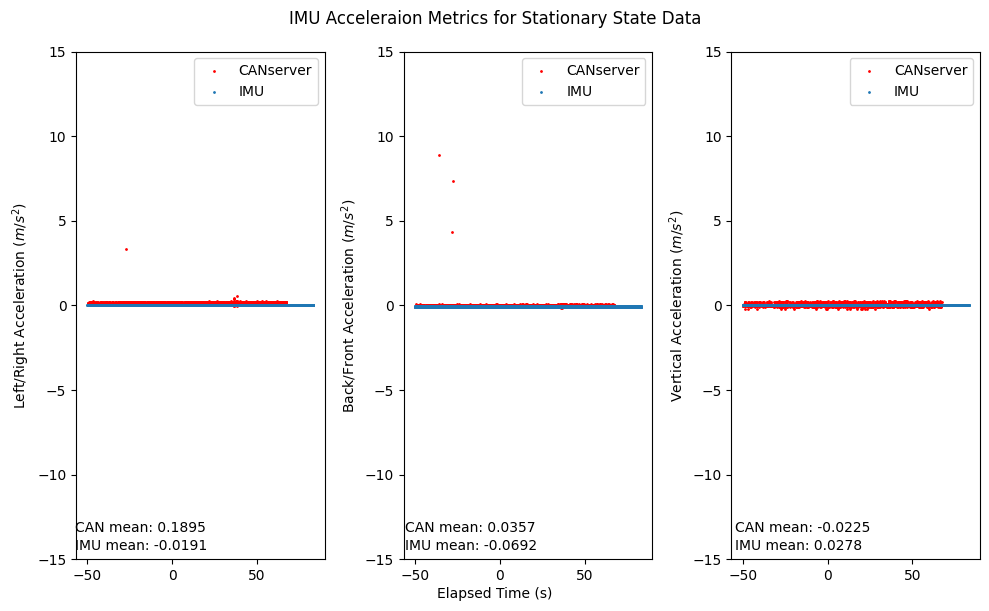

In [16]:
# plotting the IMU stationary state accelerations
edge_time = 50

for state_num in range(len(event_dict['stationary_state'])):
    ss_start_time = event_dict['stationary_state'][state_num]['start']
    ss_end_time = event_dict['stationary_state'][state_num]['end']
    ss_motion = imu_df[(imu_df['correct_timestamp'] >= ss_start_time - edge_time) 
                       & (imu_df['correct_timestamp'] <= ss_end_time + edge_time)]
    can_motion = can_df[(can_df['timestamp'] >= ss_start_time - edge_time) 
                        & (can_df['timestamp'] <= ss_end_time + edge_time)]

    if (len(ss_motion) != 0):
        print(f'CAN time is {can_motion["timestamp"].iloc[0]}')
        print(f'IMU raw time is {ss_motion["timestamp(epoch in sec)"].iloc[0]}')
        print(f'Delta is {can_motion["timestamp"].iloc[0] - ss_motion["timestamp(epoch in sec)"].iloc[0]}')
        fig, (ax1, ax2, ax3) = plt.subplots(1, 3)

        fig.set_size_inches(10,6)

        lr_mean = ss_motion['lr_acc(m/s^2)'].mean()
        bf_mean = ss_motion['bf_acc(m/s^2)'].mean()
        vert_mean = ss_motion['vert_acc(m/s^2)'].mean()
        lr_can_mean = can_motion['lr_acc'].mean()
        bf_can_mean = can_motion['bf_acc'].mean()
        vert_can_mean = can_motion['vert_acc'].mean()

        ax1.scatter(x=can_motion['timestamp'] - ss_start_time, y=can_motion['lr_acc'], s=1, color='red', label='CANserver')
        ax1.scatter(x=ss_motion['correct_timestamp'] - ss_start_time, y=-ss_motion['lr_acc(m/s^2)'], s=1, label='IMU')
        ax1.set_ylim(-15,15)

        ax2.scatter(x=can_motion['timestamp'] - ss_start_time, y=can_motion['bf_acc'], s=1, color='red', label='CANserver')
        ax2.scatter(x=ss_motion['correct_timestamp'] - ss_start_time, y=ss_motion['bf_acc(m/s^2)'], s=1, label='IMU')
        ax2.set_ylim(-15,15)

        ax3.scatter(x=can_motion['timestamp'] - ss_start_time, y=can_motion['vert_acc'], s=1, color='red', label='CANserver')
        ax3.scatter(x=ss_motion['correct_timestamp'] - ss_start_time, y=ss_motion['vert_acc(m/s^2)'], s=1, label='IMU')
        ax3.set_ylim(-15,15)

        fig.suptitle("IMU Acceleraion Metrics for Stationary State Data")
        fig.text(0.5, 0.0, 'Elapsed Time (s)', ha='center')

        fig.text(0.08,0.08,f'IMU mean: {lr_mean:.4f}')
        fig.text(0.41,0.08,f'IMU mean: {bf_mean:.4f}')
        fig.text(0.74,0.08,f'IMU mean: {vert_mean:.4f}')
        fig.text(0.08,0.11,f'CAN mean: {lr_can_mean:.4f}')
        fig.text(0.41,0.11,f'CAN mean: {bf_can_mean:.4f}')
        fig.text(0.74,0.11,f'CAN mean: {vert_can_mean:.4f}')

        ax1.set_ylabel("Left/Right Acceleration ($m/s^2$)")
        ax2.set_ylabel("Back/Front Acceleration ($m/s^2$)")
        ax3.set_ylabel("Vertical Acceleration ($m/s^2$)")

        ax1.legend()
        ax2.legend()
        ax3.legend()
        plt.tight_layout()
        plt.show()

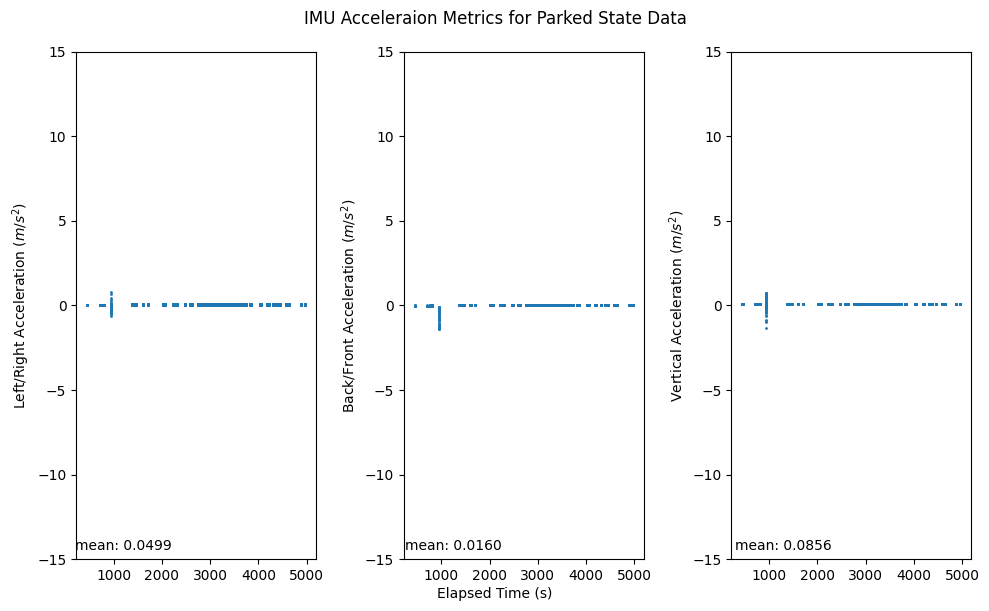

Vertical acceleration:
max: 0.7274162571462669
min: -1.3415582220052755


In [11]:
# plot the imu parked state data stitched together

pk_states= []
for state_num in range(len(event_dict['parked_state'])):
    pk_start_time = event_dict['parked_state'][state_num]['timestamp'][0]
    pk_end_time = event_dict['parked_state'][state_num]['timestamp'][1]
    pk_states.append(imu_df[(imu_df['timestamp(epoch in sec)'] >= pk_start_time) 
                            & (imu_df['timestamp(epoch in sec)'] <= pk_end_time)])
pk_motion = pd.concat(pk_states, ignore_index=True)
pk_start_time = event_dict['parked_state'][0]['timestamp'][0]
pk_motion = pk_motion[pk_motion['timestamp(epoch in sec)'] <= pk_start_time + 5000]


fig, (ax1, ax2, ax3) = plt.subplots(1, 3)

fig.set_size_inches(10,6)

lr_mean = pk_motion['lr_acc(m/s^2)'].mean()
bf_mean = pk_motion['bf_acc(m/s^2)'].mean()
vert_mean = pk_motion['vert_acc(m/s^2)'].mean()
lr_max = pk_motion['lr_acc(m/s^2)'].max()
bf_max = pk_motion['bf_acc(m/s^2)'].max()
vert_max = pk_motion['vert_acc(m/s^2)'].max()
lr_min = pk_motion['lr_acc(m/s^2)'].min()
bf_min = pk_motion['bf_acc(m/s^2)'].min()
vert_min = pk_motion['vert_acc(m/s^2)'].min()

pk_start_time = event_dict['parked_state'][0]['timestamp'][0]
ax1.scatter(x=pk_motion['timestamp(epoch in sec)'] - pk_start_time, y=pk_motion['lr_acc(m/s^2)'], s=1, label='IMU')
ax1.set_ylim(-15,15)

ax2.scatter(x=pk_motion['timestamp(epoch in sec)'] - pk_start_time, y=pk_motion['bf_acc(m/s^2)'], s=1, label='IMU')
ax2.set_ylim(-15,15)

ax3.scatter(x=pk_motion['timestamp(epoch in sec)'] - pk_start_time, y=pk_motion['vert_acc(m/s^2)'], s=1, label='IMU')
ax3.set_ylim(-15,15)

fig.text(0.08,0.08,f'mean: {lr_mean:.4f}')
fig.text(0.41,0.08,f'mean: {bf_mean:.4f}')
fig.text(0.74,0.08,f'mean: {vert_mean:.4f}')

fig.suptitle("IMU Acceleraion Metrics for Parked State Data")
fig.text(0.5, 0.0, 'Elapsed Time (s)', ha='center')

ax1.set_ylabel("Left/Right Acceleration ($m/s^2$)")
ax2.set_ylabel("Back/Front Acceleration ($m/s^2$)")
ax3.set_ylabel("Vertical Acceleration ($m/s^2$)")

plt.tight_layout()
plt.show()

print('Vertical acceleration:')
print(f'max: {vert_max}')
print(f'min: {vert_min}')